In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv("covid19_tweets.csv")
newdf = df.copy()
newdf = newdf.drop(['user_name','user_location','user_description','user_created','user_verified','date','text','hashtags','source','is_retweet'], axis=1)
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [3]:
import re
def clean_text(s):
    s = s.replace("Covid19","COVID19")
    s = s.replace("covid19","COVID19")
    s = s.replace("coronavirus","COVID19")
    s = s.replace('#','')
    s = s.replace('📍',"")
    s = s.replace('🏫',"")
    s = s.replace('💯',"")
    s = s.replace('🧵',"")
    s = s.replace('🔊',"")
    s = s.replace("●", "")
    s = s.replace("❤️", "")
    s = s.replace("🙃", "")
    s = s.replace("🤔", "")
    s = s.replace("😉", "")
    s = s.replace("⬇️", "")
    s = s.replace("🔴", "")
    s = s.replace("🤷‍", "")
    s = s.replace("🐞", "")
    s = s.replace("🚨", "")
    s = s.replace("🙌", "")
    s = s.replace("👑", "")
    s = s.replace("🔥", "")
    s = s.replace("👇", "")
    s = s.replace("👀", "")
    s = s.replace('ðŸž', "")
    s = s.replace('ðŸ¤·â€â™', "")
    s = s.replace("ðŸ”´", "")
    s = s.replace("€™", "")
    s = s.replace("ƒ¼", "")
    s = s.replace("â€˜", "")
    s = s.replace("â€™", "")
    s = s.replace("ðŸ˜˜", "")
    s = s.replace("ðŸ”Š", "")
    s = s.replace("&amp;", "&")
    s = s.replace("ðŸ§©", "")
    s = s.replace(":", "")
    s = s.replace(";", "")
    s = s.replace("'", "")
    s = s.replace("|", "")
    s = s.replace("//", "")
    s = s.replace("/", "")
    s = s.replace("-", "")
    s = s.replace("\n", "")
    s = s.replace("https", "")
    return str(s)

In [4]:
def clean_tags(s):
    s = str(s).upper()
    s = s.replace("[", "")
    s = s.replace("]", "")
    s = s.replace("'", "")
    s = s.replace("CORONAVIRUS","COVID19")
    s = s.replace("CORONAVIRUS, COVID19","COVID19")
    s = s.replace("COVID19, COVID19","COVID19")
    
    return str(s).upper()


In [5]:
df["plaintext"] = ''
df["plainhashtags"] = ''
for i, row in df.iterrows():
    df.at[i, "plain_text"] = clean_text(row.text)
    df.at[i, "plain_hashtags"] = clean_tags(row.hashtags)

In [6]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,plaintext,plainhashtags,plain_text,plain_hashtags
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,,,If I smelled the scent of hand sanitizers toda...,NAN
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,,,Hey @Yankees @YankeesPR and @MLB wouldnt it h...,NAN
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,,,@diane3443 @wdunlap @realDonaldTrump Trump nev...,COVID19
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,,,@brookbanktv The one gift COVID19 has give me ...,COVID19
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,,,25 July Media Bulletin on Novel CoronaVirusUp...,"COVID19UPDATES, COVID19"


In [7]:
import spacy
nlp = spacy.load('en_core_web_sm')
for i, row in df.iterrows():
    #if i % 1000 == 0:
       # print(i)
    if(row["plain_text"] and len(str(row["plain_text"])) < 1000000):
        doc = nlp(str(row["plain_text"]))
        adjectives = []
        nouns = []
        verbs = []
        lemmas = []

        for token in doc:
            lemmas.append(token.lemma_)
            if token.pos_ == "ADJ":
                adjectives.append(token.lemma_)
            if token.pos_ == "NOUN" or token.pos_ == "PROPN":
                nouns.append(token.lemma_)
            if token.pos_ == "VERB":
                verbs.append(token.lemma_)
                
        df.at[i, "selftext_lemma"] = " ".join(lemmas)                
        df.at[i, "selftext_nouns"] = " ".join(nouns)
        df.at[i, "selftext_adjectives"] = " ".join(adjectives)
        df.at[i, "selftext_verbs"] = " ".join(verbs)
        df.at[i, "selftext_nav"] = " ".join(nouns+adjectives+verbs)
        df.at[i, "no_tokens"] = len(lemmas)

In [8]:
df['plain_hashtags'].nunique()

21669

In [9]:
# group by category, count distinct user locations and user posts
cat_df = df.groupby('plain_hashtags') \
           .agg({'user_location': pd.Series.nunique,
                 'user_name': pd.Series.count}) \
           .rename(columns={'user_location': 'num_locations',
                            'user_name': 'num_posts'}) \
           .sort_values('num_posts', ascending=False)
            
# show top 5 records
cat_df.head(8)
        

,num_locations,num_posts
plain_hashtags,,
NAN,5847,21434
COVID19,5785,20747
"COVID19UPDATE, COVID19PANDEMIC",0,181
"COVID19UPDATES, COVID19",43,163
"INDIAFIGHTSCORONA, COVID19",35,113
"COVID19, PANDEMIC",66,113
"MONEYFORTHEPEOPLE, COVID19",66,94
"COVID19, COVID_19",28,82


In [10]:
cat_df.describe()

,num_locations,num_posts
count,21669.000000,21669.000000
mean,1.581891,3.435138
std,55.889327,202.654735
min,0.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,5847.000000,21434.000000


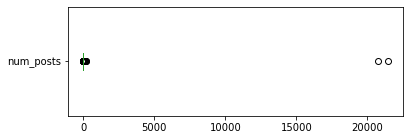

In [11]:
cat_df[['num_posts']].plot(kind='box', vert=False, figsize=(6, 2));

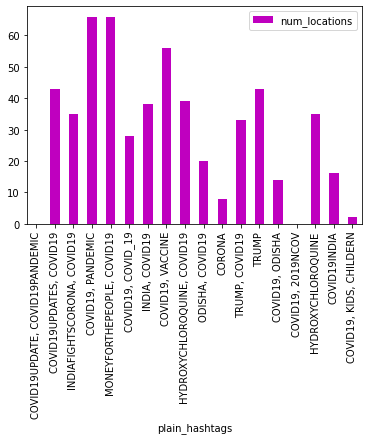

In [12]:
cat_df[['num_locations']][2:20].plot(kind='bar', color = 'm');

In [13]:
# create a data frame slice
sub_df = df[df['plain_hashtags']=='COVID19']

# sample cleaned text and tokens tagged as nouns
sub_df[['plain_text', 'selftext_nouns']].sample(2)

,plain_text,selftext_nouns
43128,So its safe enough to open schools and send fo...,school work covid19 election t.colHJpbY78Pg
37897,Watch ER Doctor ‘We Are Not Overwhelming the ...,ER doctor Health Care System Lies COVID19 t.co...


In [14]:
def my_tokenizer(text):
    return text.split() if text != None else []

In [15]:
tokens = sub_df.selftext_nouns.map(my_tokenizer).sum()

In [16]:
from collections import Counter

counter = Counter(tokens)
counter.most_common(20)

[('COVID19', 12375),
 ('covid19', 6631),
 ('case', 3336),
 ('death', 1422),
 ('people', 1140),
 ('pandemic', 740),
 ('number', 684),
 ('day', 654),
 ('%', 601),
 ('test', 593),
 ('Coronavirus', 587),
 ('today', 587),
 ('country', 539),
 ('mask', 539),
 ('spread', 516),
 ('India', 482),
 ('time', 478),
 ('state', 443),
 ('risk', 439),
 ('patient', 433)]

In [17]:
from spacy.lang.en.stop_words import STOP_WORDS

def remove_stopwords(tokens):
    """Remove stopwords from a list of tokens."""
    return [t for t in tokens if t not in STOP_WORDS]

# rebuild counter
counter = Counter(remove_stopwords(tokens))

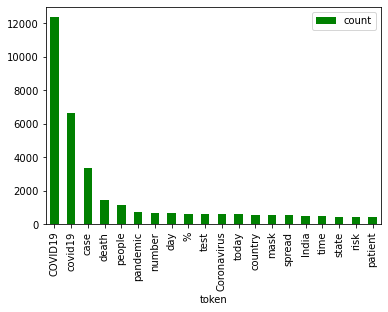

In [18]:
# convert list of tuples into data frame
freq_df = pd.DataFrame.from_records(counter.most_common(20),
                                    columns=['token', 'count'])

# create bar plot
freq_df.plot(kind='bar', x='token', color = 'g');

In [19]:
from wordcloud import WordCloud

def wordcloud(counter):
    wc = WordCloud(width=1200, height=800, 
                   background_color="white", 
                   max_words=200) 
    wc.generate_from_frequencies(counter)

    # Plot
    fig=plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

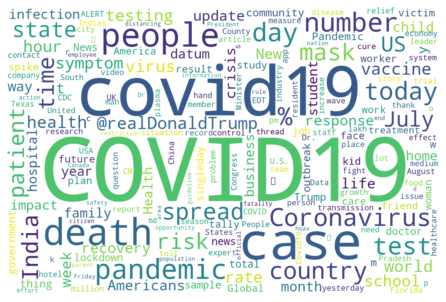

In [20]:
wordcloud(counter)

In [21]:
df['no_tokens'] = df.selftext_lemma\
  .map(lambda l: 0 if l==None else len(l.split()))

<AxesSubplot:xlabel='plain_hashtags'>

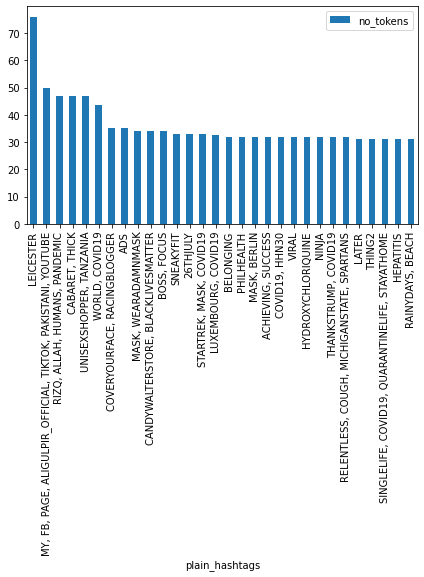

In [22]:
# mean number of tokens by category
prueba = df.groupby(['plain_hashtags']) \
  .agg({'no_tokens':'mean'}) \
  .sort_values(by='no_tokens', ascending=False);
prueba[:30].plot(kind='bar', figsize=(7,4))

In [23]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,...,plaintext,plainhashtags,plain_text,plain_hashtags,selftext_lemma,selftext_nouns,selftext_adjectives,selftext_verbs,selftext_nav,no_tokens
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,...,,,If I smelled the scent of hand sanitizers toda...,NAN,if -PRON- smell the scent of hand sanitizer to...,scent hand sanitizer today past,intoxicated,smell would think,scent hand sanitizer today past intoxicated sm...,25
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,...,,,Hey @Yankees @YankeesPR and @MLB wouldnt it h...,NAN,hey @Yankees @YankeesPR and @MLB would not -...,@Yankees @YankeesPR @MLB sense player respect ...,more,would make pay,@Yankees @YankeesPR @MLB sense player respect ...,24
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,...,,,@diane3443 @wdunlap @realDonaldTrump Trump nev...,COVID19,@diane3443 @wdunlap @realDonaldTrump Trump nev...,@realDonaldTrump Trump COVID19 hoax effort t.c...,,claim claim,@realDonaldTrump Trump COVID19 hoax effort t.c...,21
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,...,,,@brookbanktv The one gift COVID19 has give me ...,COVID19,@brookbanktv the one gift COVID19 have give -P...,gift COVID19 appreciation thing t.coZ0pOAlFXcW,simple,give,gift COVID19 appreciation thing t.coZ0pOAlFXcW...,22
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,...,,,25 July Media Bulletin on Novel CoronaVirusUp...,"COVID19UPDATES, COVID19",25 July Media Bulletin on novel coronavirusu...,July Media Bulletin novel covid19 @kansalrohit...,,coronavirusupdate,July Media Bulletin novel covid19 @kansalrohit...,14


In [24]:
df.describe()

,user_followers,user_friends,user_favourites,no_tokens
count,7.443600e+04,74436.000000,7.443600e+04,74436.000000
mean,1.059513e+05,2154.721170,1.529747e+04,19.765812
std,8.222900e+05,9365.587474,4.668971e+04,5.178983
min,0.000000e+00,0.000000,0.000000e+00,2.000000
25%,1.660000e+02,153.000000,2.200000e+02,17.000000
50%,9.600000e+02,552.000000,1.927000e+03,21.000000
75%,5.148000e+03,1780.250000,1.014800e+04,23.000000
max,1.389284e+07,497363.000000,2.047197e+06,76.000000


In [25]:
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet', 'plaintext',
       'plainhashtags', 'plain_text', 'plain_hashtags', 'selftext_lemma',
       'selftext_nouns', 'selftext_adjectives', 'selftext_verbs',
       'selftext_nav', 'no_tokens'],
      dtype='object')

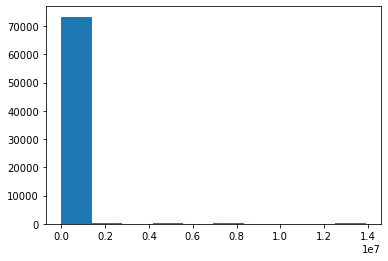

In [26]:
c1 = df['user_followers']
c2 = df['user_friends']
c3 = df['user_favourites']


hist = plt.hist(c1)

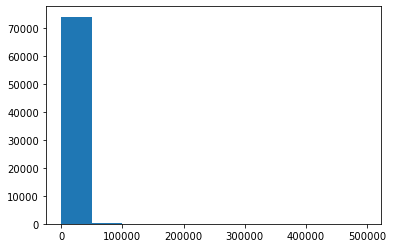

In [27]:
hist = plt.hist(c2)

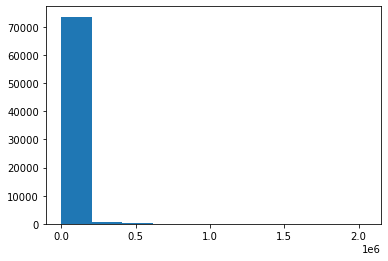

In [28]:
hist = plt.hist(c3)

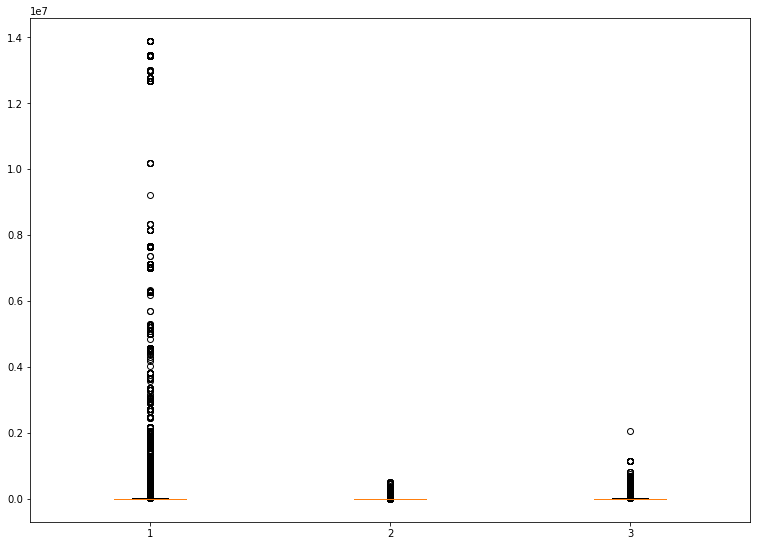

In [29]:
myData = [c1, c2, c3]
fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(myData)
plt.show()

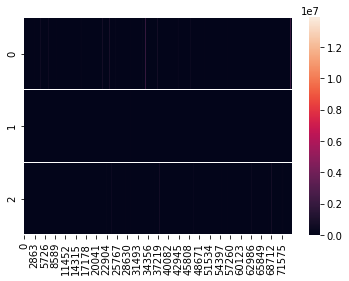

In [30]:
hplot=[c1, c2, c3]
ax = sb.heatmap(hplot)
plt.show()

In [31]:

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

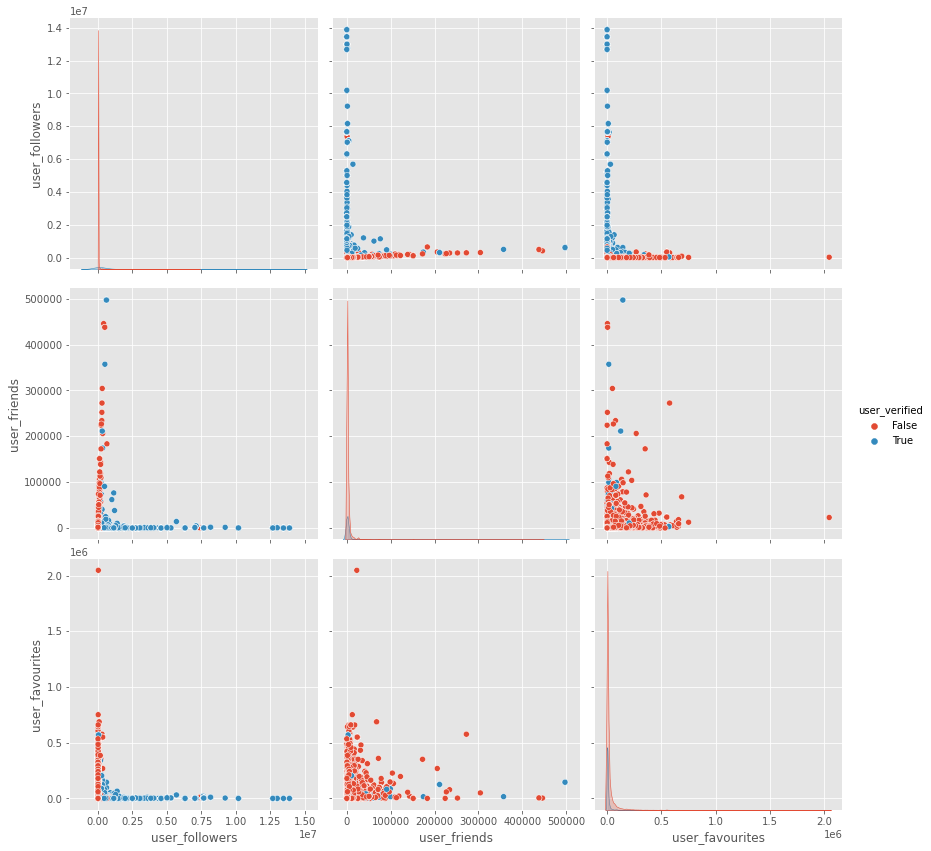

In [32]:
sb.pairplot(df.dropna(), hue='user_verified',height=4,vars=["user_followers","user_friends","user_favourites"],kind='scatter')

In [33]:
X = np.array(df[["user_followers","user_friends","user_favourites"]])
y = np.array(df['user_verified'])
X.shape
print(len(y))

74436


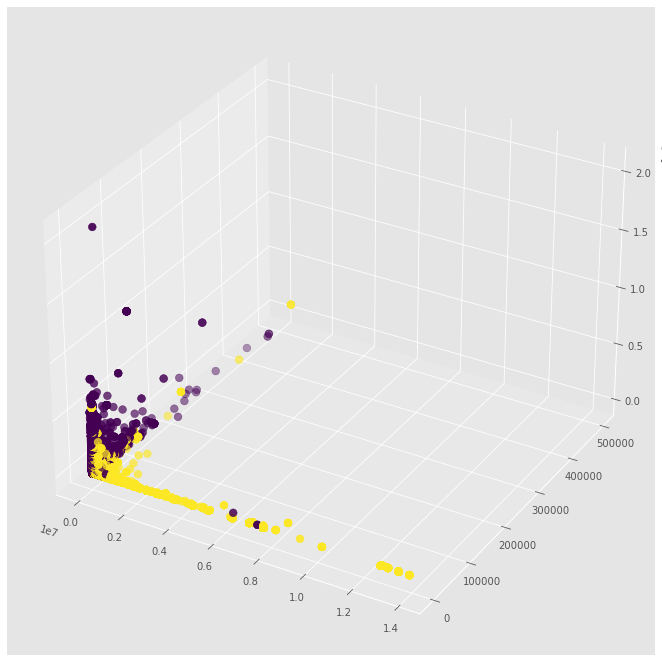

In [34]:
fig = plt.figure()
ax = Axes3D(fig)
asignar=[]
for row in y:
    asignar.append(row)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

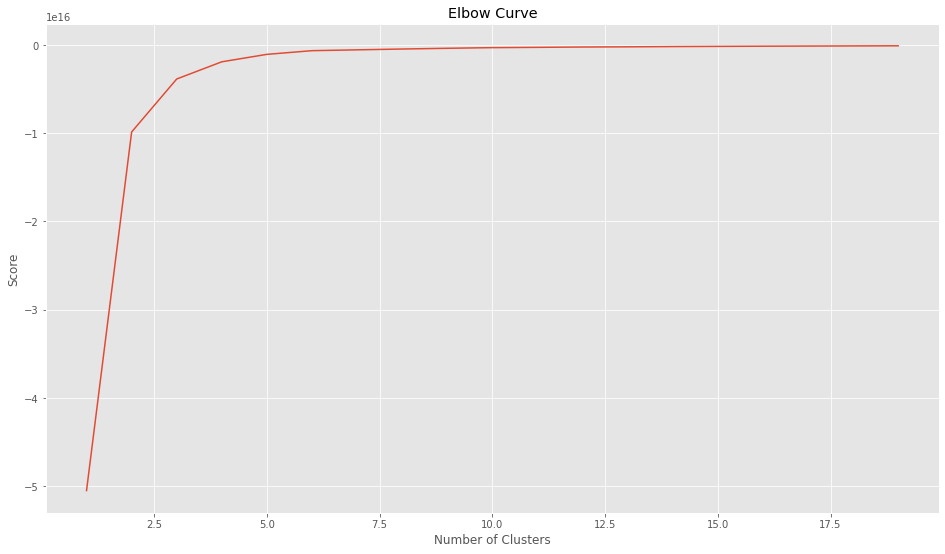

In [35]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [36]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[1.62123806e+04 2.18009121e+03 1.55466387e+04]
 [1.30086912e+07 2.19937888e+02 8.03913043e+01]
 [7.23356640e+06 9.89986441e+02 2.55654915e+03]
 [1.49737634e+06 1.25520724e+03 4.73517978e+03]
 [4.52857518e+06 4.74606383e+02 2.90532270e+03]]


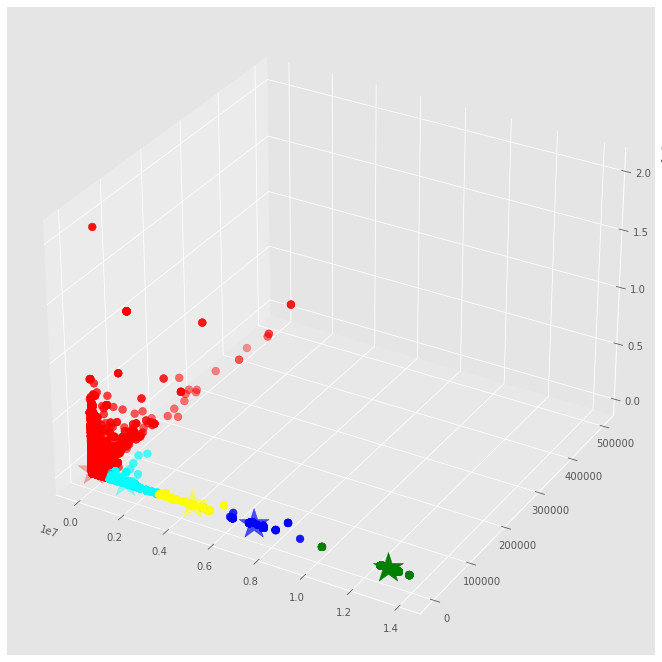

In [37]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

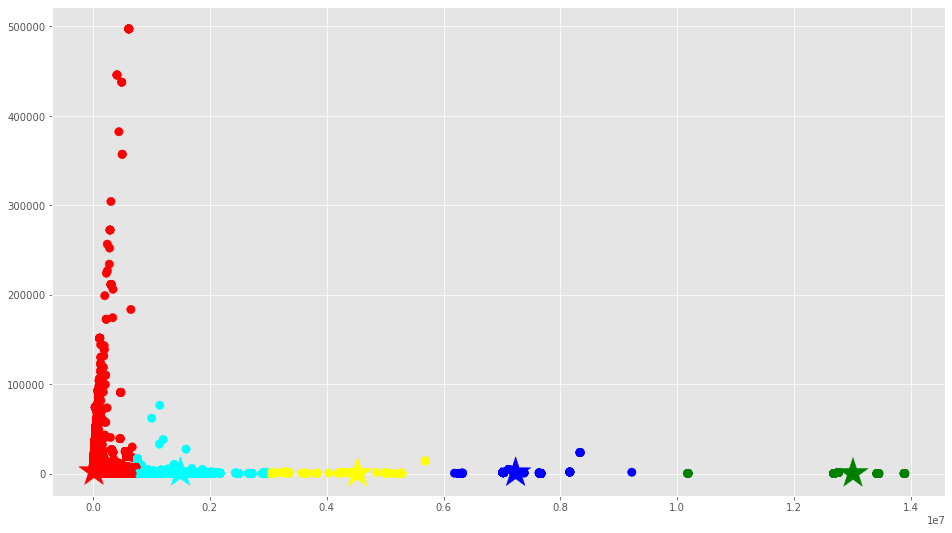

In [39]:
f1 = df['user_followers'].values
f2 = df['user_friends'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

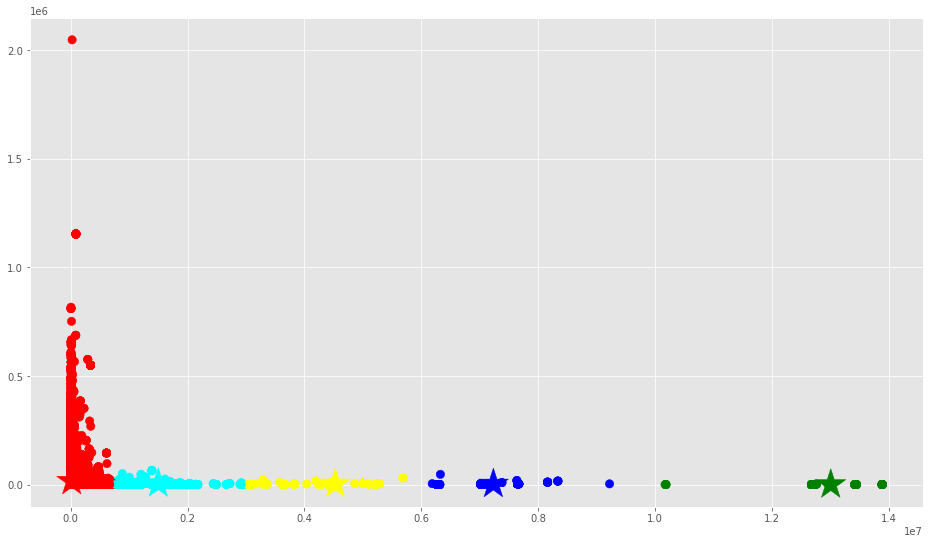

In [40]:
f1 = df['user_followers'].values
f2 = df['user_favourites'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

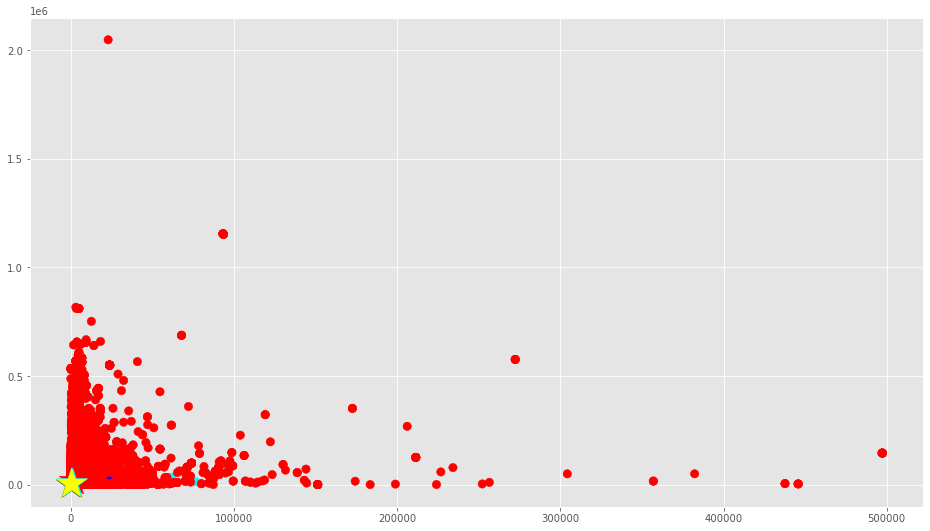

In [41]:
f1 = df['user_friends'].values
f2 = df['user_favourites'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [42]:
copy = pd.DataFrame()
copy['user_verified']=df['user_verified'].values
copy['user_verified']=df['user_verified'].values
copy['label'] = labels;
cantidadGrupo = pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['user_verified']=copy.groupby('label').size()
cantidadGrupo

,color,user_verified
0,red,72897
1,green,161
2,blue,295
3,cyan,801
4,yellow,282


In [43]:
group_referrer_index = copy['label'] == 0
group_referrals = copy[group_referrer_index]
diversidadGrupo = pd.DataFrame()
diversidadGrupo['cantidad']=group_referrals.groupby('user_verified').size()
diversidadGrupo

,cantidad
user_verified,
False,65069
True,7828


In [44]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([33916, 70675, 21017, 69690, 32871], dtype=int64)

In [45]:
users = df['user_followers'].values
for row in closest:
    print(users[row])

15615
12997738
7114528
1470499
4528913


In [46]:
X_new = np.array([[1.5,8500000,200050]]) #nuevo objeto
new_labels = kmeans.predict(X_new)
print(new_labels)

[0]
